In [1]:
import pandas as pd
import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

In [3]:
df = pd.read_csv(file_url)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

In [7]:
df_cleaned = df.copy()

In [8]:
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

In [11]:
X_train_cleaned = X_train.copy()

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [14]:
sc = StandardScaler()

In [15]:
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

In [16]:
cat_cols = ['Gender']

In [17]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [18]:
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

In [19]:
X_train_cleaned.reset_index(drop=True, inplace=True)

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [21]:
model = KElbowVisualizer(KMeans(), k=(2,15))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f66a1209950>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

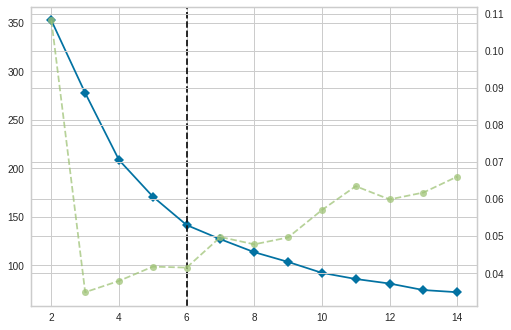

In [22]:
model.fit(X_train_cleaned)

In [23]:
n_clusters = model.elbow_value_

In [24]:
from sklearn.mixture import GaussianMixture

In [25]:
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

In [26]:
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
gmm.predict(X_train_cleaned)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

In [28]:
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

In [29]:
gmm.predict(obs)

array([2])

In [30]:
from sklearn.pipeline import Pipeline